# Rice Price Forcast, Using Time Series

Background 
- Rice is one of the one of the most consumed staples in Nigeria, which can be made into different forms. It made up to the 10% of household food spending in nigeria. In 2015 the nigeria government placed a ban on importation of rice to encourage a local local production, this in turn gave rise to high of demand of the locally produced rice.
source -  [medium-thrive-agric](https://medium.com/thrive-agric/rice-production-in-nigeria-7ef4918ced6a#:~:text=Nigeria%20is%20the%20largest%20producer,being%20the%20top%20producing%20country)

Tasks
- The task is to forecast the wholesales prices of Local Rice in nigeria for the next 12months

Time Series Forecasting
- Time series forecasting is a technique for predicting events through a time sequence.
    
Data
- The data was provided through with the assigned tasks, it contains the price list of different consumables in nigeria, since the task is to forecast the price of the wholesale price of local rice, we will be selecting only the rows containing the wholesale price in Nigeria for the analysis


# Import some of the necessary libraries for data exploration.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import datetime as dt
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import and read the data
data = pd.read_csv('/content/drive/MyDrive/Codes/wfp_food_median_prices_nigeria (1).csv')
data.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default,year,label,cmnameshort,scaling,interpolated,x
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN,0.0,#item+label,#item+name+short,NaN,NaN,NaN
1,2015-01-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,NaN,254,NaN,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
2,2015-02-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,NaN,254,NaN,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
3,2015-03-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,NaN,254,NaN,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN
4,2015-04-15,Bananas - Retail,1.3 KG,vegetables and fruits,250.0,NaN,NaN,NaN,NaN,NaN,NaN,254,NaN,NaN,4,NaN,NaN,NaN,Bananas - Retail (1.3 KG),Bananas,1.0,1.0,NaN


# General Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          5473 non-null   object 
 1   cmname        5473 non-null   object 
 2   unit          5473 non-null   object 
 3   category      5473 non-null   object 
 4   price         5473 non-null   object 
 5   currency      3515 non-null   object 
 6   country       3515 non-null   object 
 7   admname       3515 non-null   object 
 8   adm1id        3515 non-null   object 
 9   mktname       3515 non-null   object 
 10  mktid         3514 non-null   float64
 11  cmid          5473 non-null   object 
 12  ptid          3514 non-null   float64
 13  umid          3514 non-null   float64
 14  catid         5473 non-null   object 
 15  sn            3515 non-null   object 
 16  default       0 non-null      float64
 17  year          3515 non-null   float64
 18  label         5473 non-null 

In [ ]:
data.describe(include='all')

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default,year,label,cmnameshort,scaling,interpolated,x
count,5473,5473,5473,5473,5473,3515,3515,3515,3515,3515,3514.000000,5473,3514.000000,3514.000000,5473,3515,0.0,3515.000000,5473,5473,5472.000000,5472.000000,3.514000e+03
unique,73,55,28,8,1942,2,2,15,15,40,NaN,39,NaN,NaN,8,727,NaN,NaN,77,55,NaN,NaN,NaN
top,2017-01-15,Oil (palm) - Wholesale,KG,cereals and tubers,250.0,NGN,Nigeria,Borno,2216.0,Budum,NaN,62,NaN,NaN,1,1976_592_14_9,NaN,NaN,Millet - Retail (1.4 KG),Oil palm Whs.,NaN,NaN,NaN
freq,76,216,1296,2880,199,3514,3514,1146,1146,324,NaN,432,NaN,NaN,2880,62,NaN,NaN,72,216,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2120.039271,NaN,14.649687,53.449061,NaN,NaN,NaN,2017.294737,NaN,NaN,0.682632,0.357822,1.526491e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.355522,NaN,0.477136,57.898188,NaN,NaN,NaN,34.073361,NaN,NaN,0.453926,0.479403,5.134165e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1037.000000,NaN,14.000000,5.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.010000,0.000000,1.421280e+09
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.000000,NaN,14.000000,9.000000,NaN,NaN,NaN,2017.000000,NaN,NaN,0.100000,0.000000,1.487117e+09
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1981.000000,NaN,15.000000,22.000000,NaN,NaN,NaN,2018.000000,NaN,NaN,1.000000,0.000000,1.529021e+09
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2386.000000,NaN,15.000000,112.000000,NaN,NaN,NaN,2019.000000,NaN,NaN,1.000000,1.000000,1.571098e+09


In [ ]:
data.isnull().sum()

date               0
cmname             0
unit               0
category           0
price              0
currency        1958
country         1958
admname         1958
adm1id          1958
mktname         1958
mktid           1959
cmid               0
ptid            1959
umid            1959
catid              0
sn              1958
default         5473
year            1958
label              0
cmnameshort        0
scaling            1
interpolated       1
x               1959
dtype: int64

In [ ]:
data.cmname.unique()

array(['#item+name', 'Bananas - Retail', 'Beans (red) - Retail',
       'Beans (white) - Retail', 'Bread - Retail',
       'Cassava meal (gari, yellow) - Retail',
       'Cassava meal (gari, yellow) - Wholesale',
       'Cowpeas (brown) - Retail', 'Cowpeas (brown) - Wholesale',
       'Cowpeas (white) - Retail', 'Cowpeas (white) - Wholesale',
       'Cowpeas - Retail', 'Eggs - Retail', 'Fish - Retail',
       'Gari (white) - Retail', 'Gari (white) - Wholesale',
       'Groundnuts (shelled) - Retail',
       'Groundnuts (shelled) - Wholesale', 'Groundnuts - Retail',
       'Maize (white) - Retail', 'Maize (white) - Wholesale',
       'Maize (yellow) - Retail', 'Maize (yellow) - Wholesale',
       'Maize - Wholesale', 'Maize flour - Retail',
       'Meat (beef) - Retail', 'Meat (goat) - Retail', 'Milk - Retail',
       'Millet - Retail', 'Millet - Wholesale', 'Oil (palm) - Retail',
       'Oil (palm) - Wholesale', 'Oil (vegetable) - Retail',
       'Onions - Retail', 'Oranges - Retail', 

# Select the rows containing wholesale price of local rice 

In [ ]:
df = data[(data['cmname'] == 'Rice (local) - Wholesale')]
df.sample(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default,year,label,cmnameshort,scaling,interpolated,x
3863,2018-11-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,240.0,NGN,Nigeria,Yobe,2240.0,Damaturu,1969.0,71,14.0,9.0,1,1969_71_14_9,NaN,2018.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.542240e+09
3888,2020-12-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,345.0,NGN,Nigeria,Gombe,65704.0,Gombe,1972.0,71,14.0,9.0,1,1972_71_14_9,NaN,2020.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.607990e+09
3862,2018-10-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,242.0,NGN,Nigeria,Yobe,2240.0,Damaturu,1969.0,71,14.0,9.0,1,1969_71_14_9,NaN,2018.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.539562e+09
3823,2015-07-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,142.24,NGN,Nigeria,Kano,2225.0,Dawanau,1976.0,71,14.0,9.0,1,1976_71_14_9,NaN,2015.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.436918e+09
3883,2020-07-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,390.0,NGN,Nigeria,Katsina,2226.0,Dandume,1970.0,71,14.0,9.0,1,1970_71_14_9,NaN,2020.0,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.594771e+09


# Data exploration and cleaning

In [ ]:
df['price']=df['price'].apply(pd.to_numeric, errors='coerce')

In [ ]:
df['date'] = df['date'].apply(pd.to_datetime)

In [ ]:
df = df.sort_values('date')


In [ ]:
# Create new columns with the date column
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
#set date column as index
df.set_index('date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2015-01-15 to 2020-12-15
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cmname        72 non-null     object 
 1   unit          72 non-null     object 
 2   category      72 non-null     object 
 3   price         72 non-null     float64
 4   currency      70 non-null     object 
 5   country       70 non-null     object 
 6   admname       70 non-null     object 
 7   adm1id        70 non-null     object 
 8   mktname       70 non-null     object 
 9   mktid         70 non-null     float64
 10  cmid          72 non-null     object 
 11  ptid          70 non-null     float64
 12  umid          70 non-null     float64
 13  catid         72 non-null     object 
 14  sn            70 non-null     object 
 15  default       0 non-null      float64
 16  year          72 non-null     int64  
 17  label         72 non-null     object 
 18  cmnameshort 

In [ ]:
#average price according to states
RIE=df[['admname', 'price']]
rie =RIE.groupby(['admname'], as_index=False).mean()
rie=rie.sort_values(['price'], ascending=False)
rie

,admname,price
9,Zamfara,286.300000
0,Borno,276.207273
7,Oyo,271.216667
1,Gombe,266.953704
3,Kaduna,251.945000
8,Yobe,241.100000
2,Jigawa,234.924360
4,Kano,231.906667
5,Katsina,224.052000
6,Kebbi,207.728333


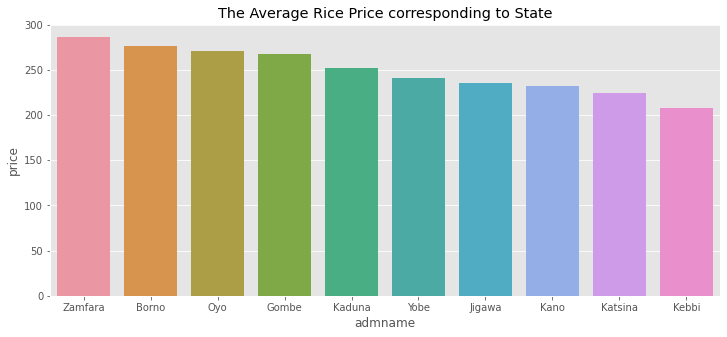

In [ ]:
fig= plt.subplots(figsize=(12,5))
g = sns.barplot(x='admname', y='price', data=rie)
g.title.set_text('The Average Rice Price corresponding to State')

In [ ]:
#average price in each month
RICE=df[['month', 'price']]
rice =RICE.groupby(['month'], as_index=True).mean()
rice=rice.sort_values(['price'], ascending=False)
rice

,price
month,
8,273.353333
9,267.211667
7,264.962222
6,263.150704
5,259.241667
12,248.521667
10,247.500000
4,247.308333
11,242.133333


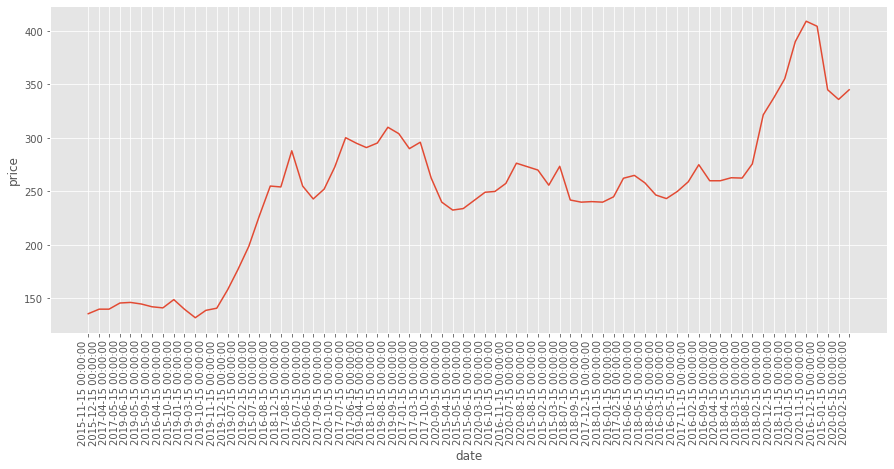

In [ ]:
#plotting a line chart to check the trend of the price over the given dates
fig, ax = plt.subplots(figsize=(15,6))

trend = df.groupby('date')['price'].mean()
trend = trend.reset_index()

sns.lineplot(x='date', y='price', data=trend, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=trend['date'].value_counts(ascending=True).index)
ax.set_xticklabels(trend['date'], rotation=90, ha="right")

plt.show()

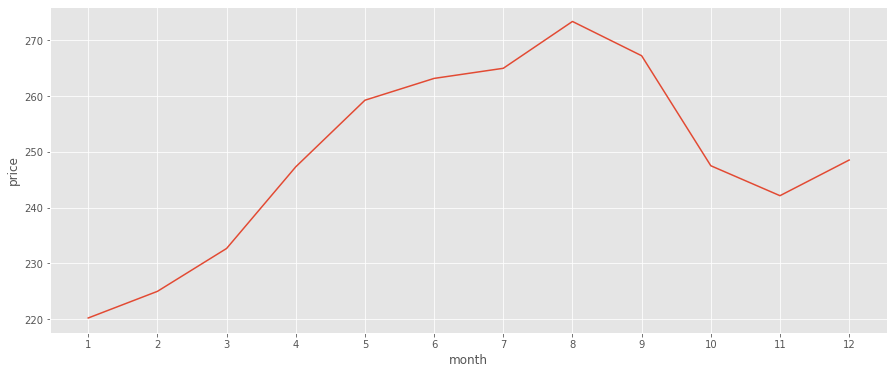

In [ ]:
#plotting a line chart to check the trend of the price over the months
fig, ax = plt.subplots(figsize=(15,6))

month = df.groupby('month')['price'].mean()
month = month.reset_index()

sns.lineplot(x='month', y='price', data=month, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=df['month'].value_counts(ascending=True).index)

plt.show()

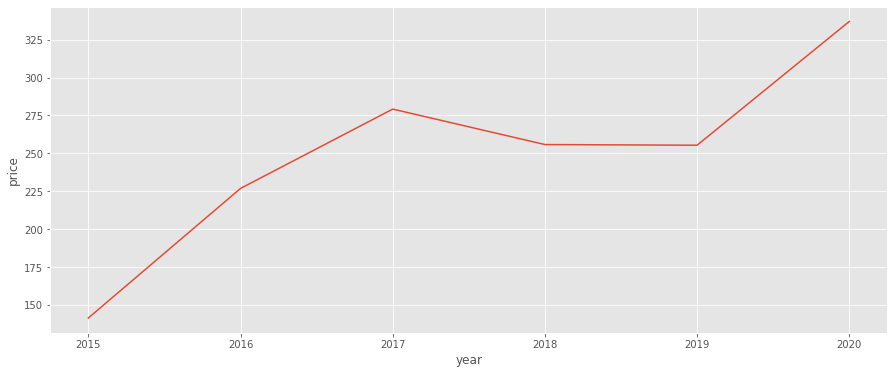

In [ ]:
#plotting a line chart to check the trend of the price over the years
fig, ax = plt.subplots(figsize=(15,6))

year = df.groupby('year')['price'].mean()
year = year.reset_index()

sns.lineplot(x='year', y='price', data=year, ci=None, markers=True, ax=ax)
ax.set_xticks(ticks=df['year'].value_counts(ascending=True).index)

plt.show()

In [ ]:
df['price'].describe()

count     72.000000
mean     249.272674
std       66.640579
min      132.000000
25%      233.650000
50%      255.440000
75%      279.300000
max      409.080000
Name: price, dtype: float64

In [ ]:
df.shape

(72, 24)

In [ ]:
#selecting only the price column
price = df['price'].values.reshape(-1, 1)
price[:5]

array([[135.75],
       [140.  ],
       [140.  ],
       [145.75],
       [146.3 ]])

# Data preparation for modelling
To prepare the data for modelling, we need to scale the data to give it a regular pattern between -1 and 1, To do this we will be using the sklearn library for preproccessing data, using the MinMax scaler to scale the data between -1 and 1

In [ ]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#assign the scaler to a variable then fit and transform the data-price column
scaler = MinMaxScaler(feature_range=(-1, 1))

scaler = scaler.fit(price)
scaled_data = scaler.transform(price)
scaled_data[:5]

array([[-0.97293201],
       [-0.94225494],
       [-0.94225494],
       [-0.90075069],
       [-0.89678071]])

# To supervised learning 
To be able to predict with a neural network, the data needs to be converted from time series to supervised learning. This can be done using different means. Here, a lag feature was generated using the shift function from the existing dataset.

In [ ]:
#Add a lagged column to the price using the shift function
df_data= pd.DataFrame(scaled_data)
lag=1
columns = [df_data.shift(i) for i in range(1, lag+1)]
columns.append(df_data)
df_data = pd.concat(columns, axis=1)
df_data.fillna(0, inplace=True)

In [ ]:
lagged_data = df_data
lagged_data.columns = ['lag', 'price']
lagged_data.head()

,lag,price
0,0.000000,-0.972932
1,-0.972932,-0.942255
2,-0.942255,-0.942255
3,-0.942255,-0.900751
4,-0.900751,-0.896781




# Forecast and modelling using LSTM
- From keras library on the tensorflow backend. LSTM stands for Long short-term Memory, It is an artificial recurrent neural network(RNN) architechture used in deep learning, It is well suited in classifying, processing, making predictions based on a time series data. Since the task involves a time series forecasting, LSTM is the best for the analysis

In [ ]:
#importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
#dividing data into features and labels,
#The model expects the input shape to be three-dimensional with [samples, timesteps, features], 
#hence it must reshape the single input sample before making the prediction.
feature_set= np.array(lagged_data)
x, y = feature_set[:, 0:-1], feature_set[:, -1:]
x = x.reshape(x.shape[0], 1, x.shape[1])

In [ ]:
x.shape

(72, 1, 1)

In [ ]:
x[:5]

array([[[ 0.        ]],

       [[-0.97293201]],

       [[-0.94225494]],

       [[-0.94225494]],

       [[-0.90075069]]])

In [ ]:
y[:5]

array([[-0.97293201],
       [-0.94225494],
       [-0.94225494],
       [-0.90075069],
       [-0.89678071]])

In [ ]:
#build our model
model = Sequential()
model.add(LSTM(units=50, batch_input_shape=(1, x.shape[1], x.shape[2]), stateful=True, return_sequences=True))
model.add(Dropout(0.2))  
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (1, 1, 50)                10400     
_________________________________________________________________
dropout_3 (Dropout)          (1, 1, 50)                0         
_________________________________________________________________
lstm_4 (LSTM)                (1, 1, 50)                20200     
_________________________________________________________________
dropout_4 (Dropout)          (1, 1, 50)                0         
_________________________________________________________________
lstm_5 (LSTM)                (1, 50)                   20200     
_________________________________________________________________
dropout_5 (Dropout)          (1, 50)                   0         
_________________________________________________________________
dense_1 (Dense)              (1, 1)                   

In [ ]:
#fit the feature and label into the model, using batch size of 1 
history = model.fit(x, y, epochs = 100, batch_size = 1, verbose=1, shuffle=False)

Epoch 1/100
72/72 [==============================] - 4s 3ms/step - loss: 0.4011
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 3/100
72/72 [==============================] - 0s 2ms/step - loss: 0.3286
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.2932
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.2813
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.2588
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: 0.2207
Epoch 8/100
72/72 [==============================] - 0s 3ms/step - loss: 0.2226
Epoch 9/100
72/72 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 10/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1588
Epoch 11/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1186
Epoch 12/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1076
Epoch 13/100
72/72 [=================

<function matplotlib.pyplot.show>

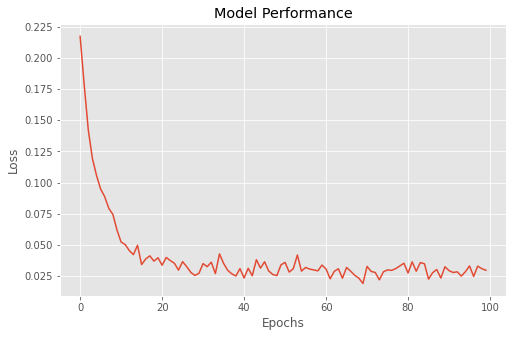

In [ ]:
#plot the model performance
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Performance")
plt.show

In [ ]:
#make prediction on the dataset
prediction = model.predict(x, batch_size=1)
prediction[:5]

array([[-0.40902478],
       [-0.9493515 ],
       [-0.9799767 ],
       [-0.9960539 ],
       [-0.97945786]], dtype=float32)

In [ ]:
#inverse transform the prediction to get the actual prediction price from the scaled one
inverse_pred = scaler.inverse_transform(prediction)
inverse_pred[:5]

array([[213.8737 ],
       [139.01685],
       [134.77403],
       [132.54669],
       [134.8459 ]], dtype=float32)

In [ ]:
#make the actual price and predicted price into a dataframe for easy comparison
df_pred = pd.DataFrame()

df_pred['date'] = df.index
df_pred['price'] = list(df['price'])
df_pred['prediction'] = inverse_pred
df_pred.head()

,date,price,prediction
0,2015-01-15,135.75,213.873703
1,2015-02-15,140.00,139.016846
2,2015-03-15,140.00,134.774033
3,2015-04-15,145.75,132.546692
4,2015-05-15,146.30,134.845901


# scoring the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_true, y_pred = np.array(df_pred['price']), np.array(df_pred['prediction'])

In [ ]:
print('MSE', mean_squared_error(y_true, y_pred))

MSE 509.6561592816484


In [ ]:
print('RMSE ', np.sqrt(np.mean(np.abs((y_true - y_pred) / y_true)) * 100))

RMSE  2.5934889762377416


In [ ]:
print('R2 Score ', r2_score(y_true, y_pred))

R2 Score  0.8836211927092437


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(df_pred['price'], df_pred['prediction'])
mape

6.726185069866688

# Compare the actual price and the prediction

In [ ]:
#SET DATE COLUMN AS INDEX
df_pred.set_index('date', inplace=True)
df_pred.index = pd.to_datetime(df_pred.index)

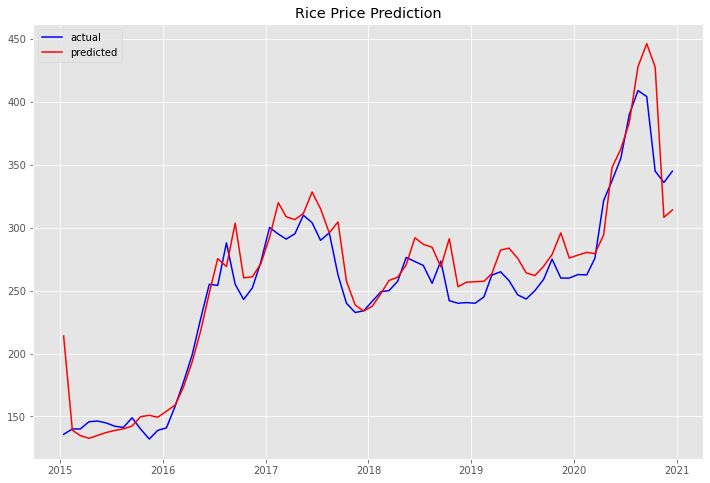

In [ ]:
#plot the actual and the predicted price
plt.figure(figsize=(12,8))
plt.plot(df_pred['price'], color="blue", label="actual")
plt.plot(df_pred['prediction'], color="red", label="predicted")
plt.title("Rice Price Prediction")
plt.legend()
plt.show()

In [ ]:
df.tail()

,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default,year,label,cmnameshort,scaling,interpolated,x,day,month
date,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,409.08,NGN,Nigeria,Borno,2216.0,Biu,1968.0,71,14.0,9.0,1,1968_71_14_9,NaN,2020,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.597450e+09,15,8
2020-09-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,404.35,NGN,Nigeria,Borno,2216.0,Biu,1968.0,71,14.0,9.0,1,1968_71_14_9,NaN,2020,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.600128e+09,15,9
2020-10-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,345.00,NGN,Nigeria,Jigawa,2223.0,Gujungu,1973.0,71,14.0,9.0,1,1973_71_14_9,NaN,2020,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.602720e+09,15,10
2020-11-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,336.00,NGN,Nigeria,Jigawa,2223.0,Gujungu,1973.0,71,14.0,9.0,1,1973_71_14_9,NaN,2020,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.605398e+09,15,11
2020-12-15,Rice (local) - Wholesale,1/100 100 KG,cereals and tubers,345.00,NGN,Nigeria,Gombe,65704.0,Gombe,1972.0,71,14.0,9.0,1,1972_71_14_9,NaN,2020,Rice (local) - Wholesale (1/100 100 KG),Rice loc. Whs.,0.01,0.0,1.607990e+09,15,12


# Focasting 12 months

In [ ]:
#past price data scaled
price_ = scaler.transform([df['price']]).reshape(-1)
price_[:5]

array([-0.97293201, -0.94225494, -0.94225494, -0.90075069, -0.89678071])

In [ ]:
price_.shape

(72,)

In [ ]:
#1 year, 12 months forcast

num_prediction = 11
look_back = 1
past = price_
forecast = past[-look_back:] 
for _ in range(num_prediction):
        x = forecast[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        forecast = np.append(forecast, out)
        
forecast = forecast[look_back-1:]

In [ ]:
#12months forcast date
last_date = df_pred.index.values[-1]
forecast_dates = pd.date_range(last_date, periods=num_prediction+1, freq='MS').tolist()
forecast_dates[:5]

[Timestamp('2021-01-01 00:00:00', freq='MS'),
 Timestamp('2021-02-01 00:00:00', freq='MS'),
 Timestamp('2021-03-01 00:00:00', freq='MS'),
 Timestamp('2021-04-01 00:00:00', freq='MS'),
 Timestamp('2021-05-01 00:00:00', freq='MS')]

In [ ]:
#forecast
forecast

array([ 0.5374621 ,  0.38558626,  0.0673452 , -0.3539542 , -0.67463869,
       -0.82384181, -0.88910699, -0.92017084, -0.93426061, -0.93742275,
       -0.93003976, -0.91001737])

In [ ]:
len(forecast_dates)

12

In [ ]:
#inverse transform the forecast to get the actual forecast price from the scaled one
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast[:5]

array([[345.        ],
       [323.9591207 ],
       [279.87000428],
       [221.50318569],
       [177.07555609]])

In [ ]:
len(forecast)

12

In [ ]:
#forcast into dataframe
future = pd.DataFrame()
future['date'] = list(forecast_dates)
future['predicted_price'] = forecast
future.set_index('date', inplace=True)
future.index = pd.to_datetime(future.index)
future.head()

,predicted_price
date,
2021-01-01,345.000000
2021-02-01,323.959121
2021-03-01,279.870004
2021-04-01,221.503186
2021-05-01,177.075556


<function matplotlib.pyplot.show>

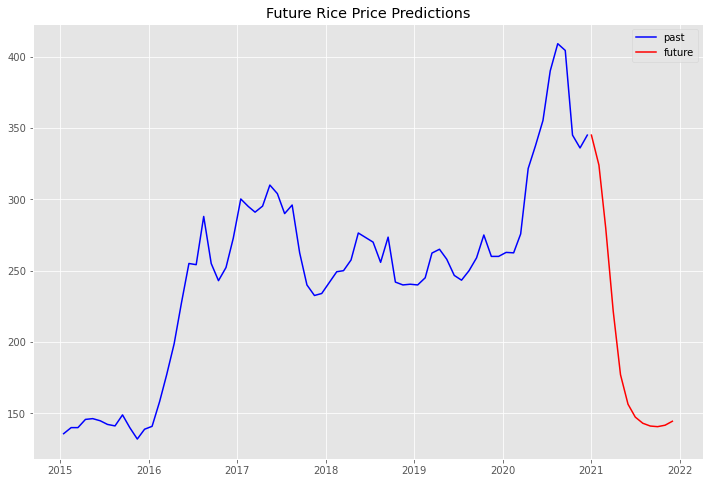

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(df_pred['price'], color='blue', label="past")
plt.plot(future['predicted_price'], color='red', label="future")
plt.title('Future Rice Price Predictions')
plt.legend()
plt.show

# Conclusion
The model performance on the existing data gave an r2 score of 88.36%

The model forecast that the price of wholesale local rice will drastically reduce in 2022.